In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import datetime
import random

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


seed = 309
random.seed(seed)
np.random.seed(seed)

In [3]:
df = pd.read_csv("/Users/keirynhart/Documents/Uni/Comp 309/Assignment 4/Assignment 4 - hand in/Part 1/diamonds.csv")
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [4]:
df.isnull().values.any()

False

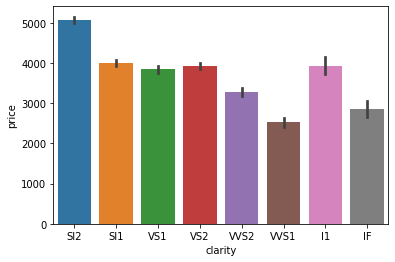

In [5]:

#sns.barplot(x = "cut", y = "price", data = df)
#sns.barplot(x = "color", y = "price", data = df)
sns.barplot(x = "clarity", y = "price", data = df)

Changing variables:

In [6]:
df['cut'] = df['cut'].apply(lambda x: 1 if x=='Fair' else(2 if x=='Good' 
                                           else(3 if x=='Very Good' 
                                           else(4 if x=='Premium' else 5))))

df['color'] = df['color'].apply(lambda x: 1 if x=='J' else(2 if x=='I'
                                          else(3 if x=='H'
                                          else(4 if x=='G'
                                          else(5 if x=='F'
                                          else(6 if x=='E' else 7))))))

df['clarity'] = df['clarity'].apply(lambda x: 1 if x=='I1' else(2 if x=='SI2'
                                          else(3 if x=='SI1'
                                          else(4 if x=='VS2'
                                          else(5 if x=='VS1'
                                          else(6 if x=='WS2'
                                          else 7 if x=='WS1' else 8))))))

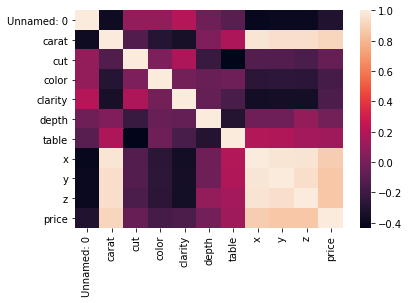

In [7]:
sns.heatmap(df.corr())

# Training and Testing:

In [8]:
train_data, test_data = train_test_split(df, test_size = 0.3, random_state = seed)

In [9]:
train_data.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,26932.728137,0.798166,3.903438,4.412045,4.302717,61.741557,57.458660,5.733020,5.737242,3.539638,3930.603130
std,15561.556646,0.472857,1.113829,1.700652,2.052403,1.426374,2.240281,1.120184,1.152877,0.708507,3973.019456
min,3.000000,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,0.000000,0.000000,0.000000,327.000000
25%,13448.250000,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,4.720000,4.720000,2.910000,953.000000
50%,26890.500000,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,40425.750000,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5330.000000
max,53940.000000,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [10]:
test_data.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000
mean,27058.634347,0.797413,3.905636,4.391237,4.315721,61.767717,57.453739,5.726811,5.728189,3.536623,3937.925102
std,15594.073336,0.476709,1.123071,1.702125,2.061084,1.446973,2.220987,1.125455,1.116677,0.699120,4027.612178
min,1.000000,0.200000,1.000000,1.000000,1.000000,50.800000,50.100000,0.000000,0.000000,0.000000,326.000000
25%,13626.750000,0.400000,3.000000,3.000000,3.000000,61.100000,56.000000,4.702500,4.720000,2.910000,947.000000
50%,27138.000000,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2394.000000
75%,40520.250000,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5314.750000
max,53939.000000,4.000000,5.000000,7.000000,8.000000,79.000000,73.000000,10.010000,9.940000,6.310000,18804.000000


In [11]:
train_labels = train_data['price']

#copy
train_data_full = train_data.copy()

train_data = train_data.drop(['price'], axis = 1)

In [12]:
test_labels = test_data["price"]

#copy
test_data_full = test_data.copy()


#drop price
test_data = test_data.drop(['price'], axis = 1)

In [13]:
print('Linear regression:')

lr = LinearRegression()
lr.fit(train_data, train_labels)

y_pred = lr.predict(test_data)

coef = lr.coef_
intercept = lr.intercept_

print("coefficients: ", coef)
print("intercept: ", intercept)

lr.score(test_data, test_labels)

lr_mse = mean_squared_error(test_labels, y_pred)
lr_r2 = lr.score(test_data, test_labels)
lr_mae = mean_absolute_error(test_labels, y_pred)

print("MSE: ", "%.2f" % lr_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(lr_mse)))
print("r2: ", "%.2f" % lr_r2)
print("MAE: ", "%.2f" % lr_mae)



print('K-neighbours regression:')

from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors = 2)

kn.fit(train_data, train_labels)

y_pred1 = kn.predict(test_data)



kn.score(test_data, test_labels)

kn_mse = mean_squared_error(test_labels, y_pred1)
kn_r2 = kn.score(test_data, test_labels)
kn_mae = mean_absolute_error(test_labels, y_pred1)

print("MSE: ", "%.2f" % kn_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(kn_mse)))
print("r2: ", "%.3f" % kn_r2)
print("MAE: ", "%.2f" % kn_mae)

print('Ridge Regression:')


from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(train_data, train_labels)

y_pred2 = ridge.predict(test_data)

ridge.score(test_data, test_labels)

ridge_mse = mean_squared_error(test_labels, y_pred2) 
ridge_r2 = ridge.score(test_data, test_labels)
ridge_mae = mean_absolute_error(test_labels, y_pred2)

print("MSE: ", "%.2f" % ridge_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(ridge_mse)))
print("r2: ", "%.2f" % ridge_r2)
print("MAE: ", "%.2f" % ridge_mae)

print('decision Tree Regression:')


from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)

tree.fit(train_data, train_labels)

y_pred3 = tree.predict(test_data)

tree.score(test_data, test_labels)

tree_mse = mean_squared_error(test_labels, y_pred3)  
tree_r2 = tree.score(test_data, test_labels)
tree_mae = mean_absolute_error(test_labels, y_pred3)

print("MSE: ", "%.2f" % tree_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(tree_mse)))
print("r2: ", "%.2f" % tree_r2)
print("MAE: ", "%.2f" % tree_mae)

print('Random Forest Regression:')


from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)

rf.fit(train_data, train_labels)

y_pred4 = rf.predict(test_data)

rf.score(test_data, test_labels)

rf_mse = mean_squared_error(test_labels, y_pred4)  
rf_r2 = rf.score(test_data, test_labels)
rf_mae = mean_absolute_error(test_labels, y_pred4)

print("MSE: ", "%.2f" % rf_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(rf_mse)))
print("r2: ", "%.2f" % rf_r2)
print("MAE: ", "%.2f" % rf_mae)

print('Gradient Boost Regression:')

from sklearn.ensemble import GradientBoostingRegressor

gradient = GradientBoostingRegressor()

gradient.fit(train_data, train_labels)

y_pred5 = gradient.predict(test_data)

gradient.score(test_data, test_labels)

gradient_mse = mean_squared_error(test_labels, y_pred5)  
gradient_r2 = gradient.score(test_data, test_labels) 
gradient_mae = mean_absolute_error(test_labels, y_pred5)

print("MSE: ", "%.2f" % gradient_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(gradient_mse)))
print("r2: ", "%.3f" % gradient_r2)
print("MAE: ", "%.2f" % gradient_mae)

print('SGD Regression:')


from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SGD = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000))

SGD.fit(train_data, train_labels)

y_pred6 = SGD.predict(test_data)

SGD.score(test_data, test_labels)

SGD_mse = mean_squared_error(test_labels, y_pred6) 
SGD_r2 = SGD.score(test_data, test_labels)
SGD_mae = mean_absolute_error(test_labels, y_pred6)

print("MSE: ", "%.2f" % SGD_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(SGD_mse)))
print("r2: ", "%.2f" % SGD_r2)
print("MAE: ", "%.2f" % SGD_mae)

print('SVR Regression:')

from sklearn.svm import SVR

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

svr.fit(train_data, train_labels)

y_pred7 = svr.predict(test_data)

svr.score(test_data, test_labels)

svr_mse = mean_squared_error(test_labels, y_pred7)   
svr_r2 = svr.score(test_data, test_labels)
svr_mae = mean_absolute_error(test_labels, y_pred7)

print("MSE: ", "%.2f" % svr_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(svr_mse)))
print("r2: ", "%.2f" % svr_r2)
print("MAE: ", "%.2f" % svr_mae)

print('Linear SVR Regression:')

#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin = make_pipeline(StandardScaler(), SVR(kernel = 'linear', C=1.0, epsilon=0.2, gamma = 'auto'))

svr_lin.fit(train_data, train_labels)

y_pred8 = svr_lin.predict(test_data)

svr_lin.score(test_data, test_labels)

svr_lin_mse = mean_squared_error(test_labels, y_pred8) 
svr_lin_r2 = svr_lin.score(test_data, test_labels)
svr_lin_mae = mean_absolute_error(test_labels, y_pred8)

print("MSE: ", "%.2f" % svr_lin_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(svr_lin_mse)))
print("r2: ", "%.2f" % svr_lin_r2)
print("MAE: ", "%.2f" % svr_lin_mae)

print('Multilayer Perceptron Regression:')

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state=1, max_iter=500)

MLP.fit(train_data, train_labels)

y_pred9 = MLP.predict(test_data)

MLP.score(test_data, test_labels)

MLP_mse = mean_squared_error(test_labels, y_pred9)
MLP_r2 = MLP.score(test_data, test_labels)
MLP_mae = mean_absolute_error(test_labels, y_pred9)

print("MSE: ", "%.2f" % MLP_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(MLP_mse)))
print("r2: ", "%.2f" % MLP_r2)
print("MAE: ", "%.2f" % MLP_mae)

table = {'Name':  ['linear regression', 'k-neighbors regression', 'Ridge regression', 'decision tree regression', 'random forest regression', 'gradient Boosting regression', 'SGD regression', 'support vector regression', 'linear SVR', 'multi-layer perceptron regression'],
         'MSE': [lr_mse, kn_mse, ridge_mse, tree_mse, rf_mse, gradient_mse, SGD_mse, svr_mse, svr_lin_mse, MLP_mse],
         'RMSE': [np.sqrt(lr_mse), np.sqrt(kn_mse), np.sqrt(ridge_mse), np.sqrt(tree_mse), np.sqrt(rf_mse), np.sqrt(gradient_mse), np.sqrt(SGD_mse), np.sqrt(svr_mse), np.sqrt(svr_lin_mse), np.sqrt(MLP_mse)],
         'r2': [lr_r2, kn_r2, ridge_r2, tree_r2, rf_r2, gradient_r2, SGD_r2, svr_r2, svr_lin_r2, MLP_r2],
         'MAE':[lr_mae, kn_mae, ridge_mae, tree_mae, rf_mae, gradient_mae, SGD_mae, svr_mae, svr_lin_mae, MLP_mae]}
         
         

        
table = pd.DataFrame (table, columns = ['Name','MSE','RMSE', 'r2', 'MAE'])

table['r2'] = table['r2'].round(3)
table['MSE'] = table['MSE'].round(2)
table['RMSE'] = table['RMSE'].round(2)
table['MAE'] = table['MAE'].round(2)
table
         

Linear regression:
coefficients:  [ 5.11432796e-03  1.06524125e+04  1.27265673e+02  3.06160702e+02
  3.72835470e+02 -8.06752989e+01 -2.81078165e+01 -8.33539554e+02
  2.48995494e+01 -1.91907434e+01]
intercept:  3138.5246568301427
MSE:  1603591.70
RMSE: 1266.33
r2:  0.90
MAE:  824.08
K-neighbours regression:
MSE:  56342.18
RMSE: 237.37
r2:  0.997
MAE:  17.64
Ridge Regression:
MSE:  1603583.40
RMSE: 1266.33
r2:  0.90
MAE:  824.54
decision Tree Regression:
MSE:  1881412.36
RMSE: 1371.65
r2:  0.88
MAE:  915.17
Random Forest Regression:
MSE:  1824077.58
RMSE: 1350.58
r2:  0.89
MAE:  901.43
Gradient Boost Regression:
MSE:  51293.66
RMSE: 226.48
r2:  0.997
MAE:  125.06
SGD Regression:
MSE:  1612405.44
RMSE: 1269.81
r2:  0.90
MAE:  829.02
SVR Regression:
MSE:  8126705.05
RMSE: 2850.74
r2:  0.50
MAE:  1338.80
Linear SVR Regression:
MSE:  2516693.59
RMSE: 1586.41
r2:  0.84
MAE:  854.06
Multilayer Perceptron Regression:
MSE:  498109.19
RMSE: 705.77
r2:  0.97
MAE:  460.94


,Name,MSE,RMSE,r2,MAE
0,linear regression,1603591.70,1266.33,0.901,824.08
1,k-neighbors regression,56342.18,237.37,0.997,17.64
2,Ridge regression,1603583.40,1266.33,0.901,824.54
3,decision tree regression,1881412.36,1371.65,0.884,915.17
4,random forest regression,1824077.58,1350.58,0.888,901.43
5,gradient Boosting regression,51293.66,226.48,0.997,125.06
6,SGD regression,1612405.44,1269.81,0.901,829.02
7,support vector regression,8126705.05,2850.74,0.499,1338.80
8,linear SVR,2516693.59,1586.41,0.845,854.06
9,multi-layer perceptron regression,498109.19,705.77,0.969,460.94
